# Multiple Linear Regression
## BIKE SHARING ASSIGNMENT


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike_sharing dataset

In [65]:
# Supress Warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [67]:
bike_sharing = pd.read_csv("day.csv")

In [68]:
# Check the head of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike_sharing dataframe

In [69]:
bike_sharing.shape

(730, 16)

In [70]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [71]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

#Even though certain variables are numerical, they are actually categorical so converting those numerical values to categorical values 
#Converting season, weathersit, mnth, weekday



In [73]:
#Converting numerical variables to their respective categorical variables 

bike_sharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_sharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_sharing.mnth = bike_sharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_sharing.weekday = bike_sharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Before we move on to visualization, we need to remove certain variables 

1.Removing dteday as already we do have separate columns to capture the date's year, month, holiday, weekday 

2.Removing instant as this indicates just an index 


3.Removing casual and registerd column as cnt represents the sum of casual and registered

In [75]:
#Removing instant, dteday, casual and registered columns 
bike_sharing = bike_sharing.drop(columns=['instant','dteday','casual','registered'])
bike_sharing.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,spring,1,dec,0,thu,1,moderate,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,moderate,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sat,0,moderate,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,good,10.489153,11.58500,48.3333,23.500518,1796
729,spring,1,dec,0,mon,1,moderate,8.849153,11.17435,57.7500,10.374682,2729


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

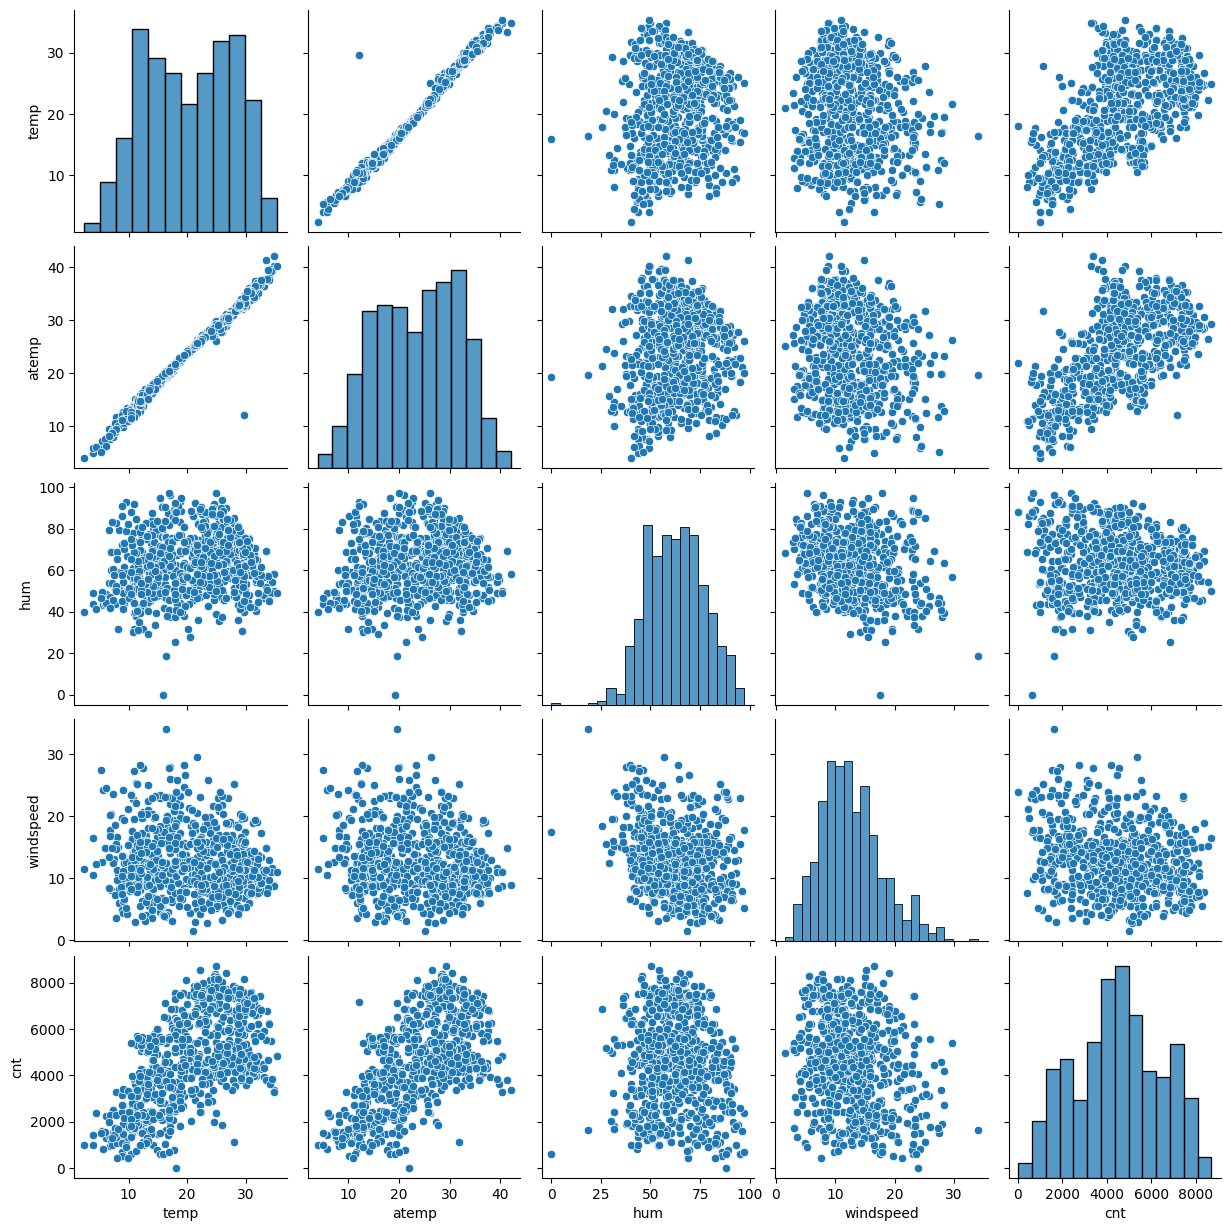

In [77]:
#For paiplot, having only variables temp, atemp, hum, windspeed and cnt 
bike_sharing_numeric = bike_sharing[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_sharing_numeric)
plt.show()

# INFERENCE FROM PAIRPLOT FOR CNT VS NUMERIC VARIABLES 

 1. From the last row of plots, we can observe that temp and atemp are highly correlated with target variable cnt 
 
 2. temp and atemp are highly correlated with each other

In [78]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

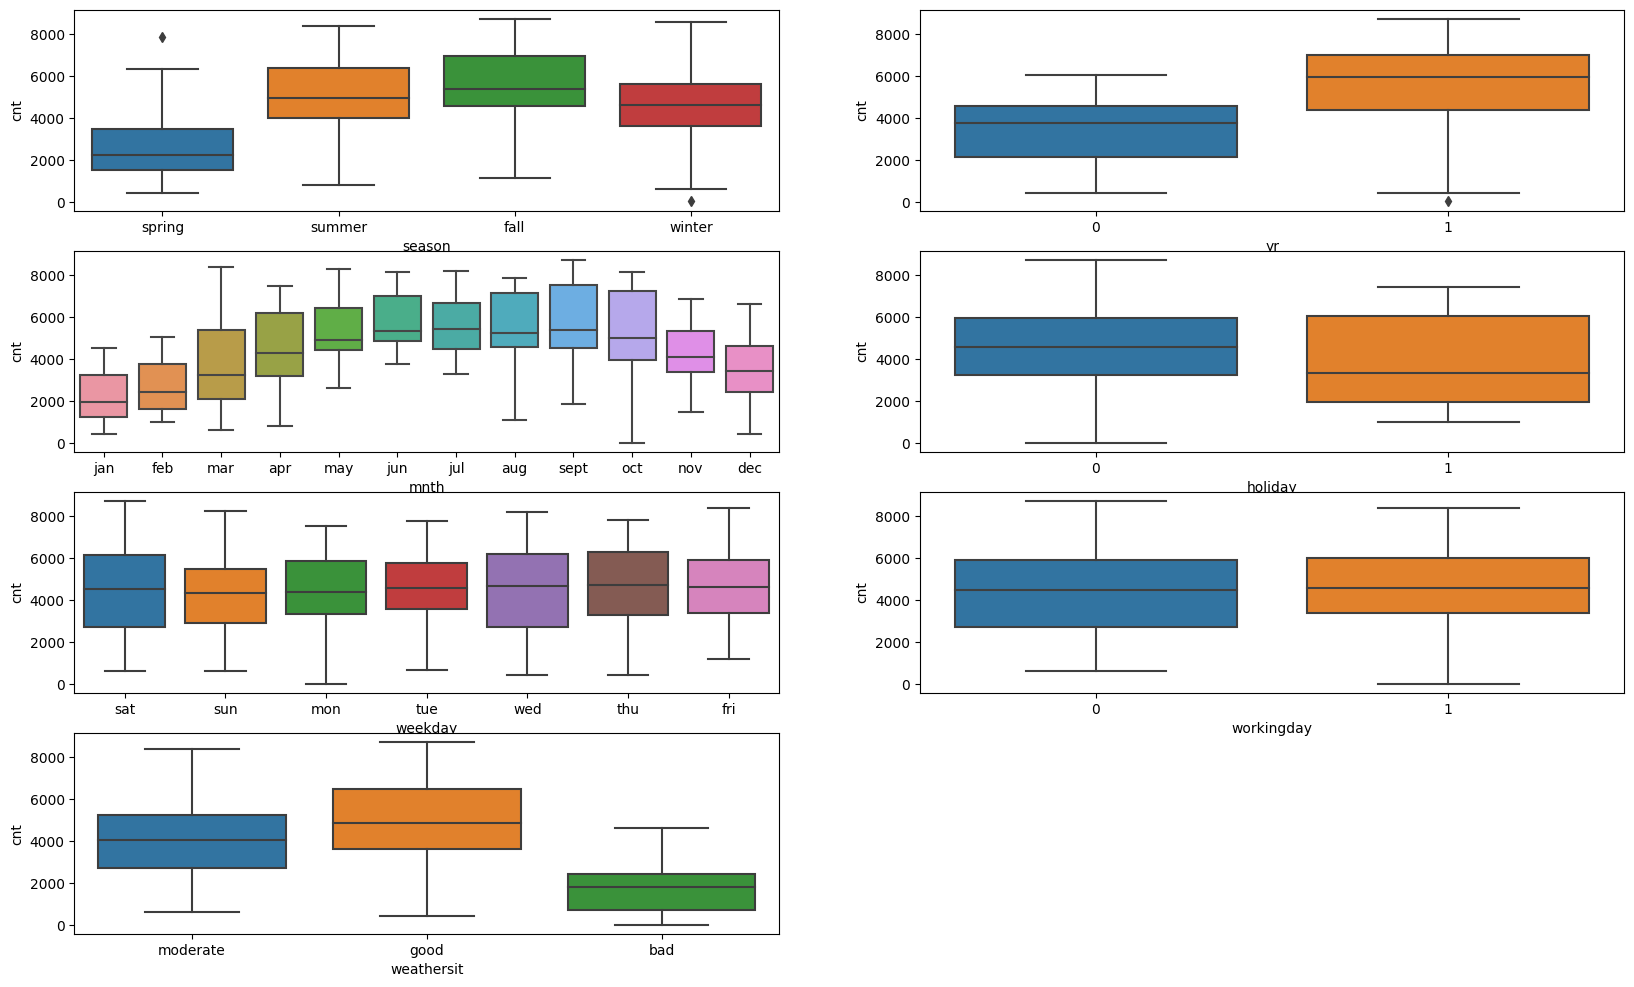

In [80]:
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()

# Inference for categorical variables 
1. By season, fall season has higher number of rental demand for bikes 
2. The demand for bikes has grown  in 2019 compared to 2018
3. Sep month has the higher demand and demand is above 4000 in the months of jun to oct and lowest demand during jan to march
4. Working days has higher demand than non working days 
5. Non holiday days have higher demand than holiday days
6. There is no trend by different days of the week
7. Good weather has higher demand for bikes

## Step 3: Data Preparation

In [81]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

The variable season,mnth,weekday,weathersit are categorical variables. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [82]:
# Get the dummy variables and store it in a new variable 
# Let's drop the first column from season_dummy_var df using 'drop_first = True'
#drop_first = 'True' to drop reduntant dummy variable and also for n levels, we need only n-1 dummy variables
season_dummy_var = pd.get_dummies(bike_sharing['season'], drop_first = True)
mnth_dummy_var = pd.get_dummies(bike_sharing['mnth'], drop_first = True)
weekday_dummy_var = pd.get_dummies(bike_sharing['weekday'], drop_first = True)
weather_dummy_var = pd.get_dummies(bike_sharing['weathersit'], drop_first = True)

#Concat the dummy variables with bike sharing dataset 
bike_sharing = pd.concat([bike_sharing, season_dummy_var, mnth_dummy_var, weekday_dummy_var, weather_dummy_var], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,1,0
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,1,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0


In [83]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'good', 'moderate'],
      dtype='object')

In [84]:
# Drop categorical variables  as we have created the dummies for it

bike_sharing = bike_sharing.drop(columns=['season','mnth','weekday','weathersit'])
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'good', 'moderate'],
      dtype='object')

In [85]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [86]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [87]:
df_train.head() #dependent variable price is included we need to remove this using pop (written down under)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [92]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [93]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [94]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


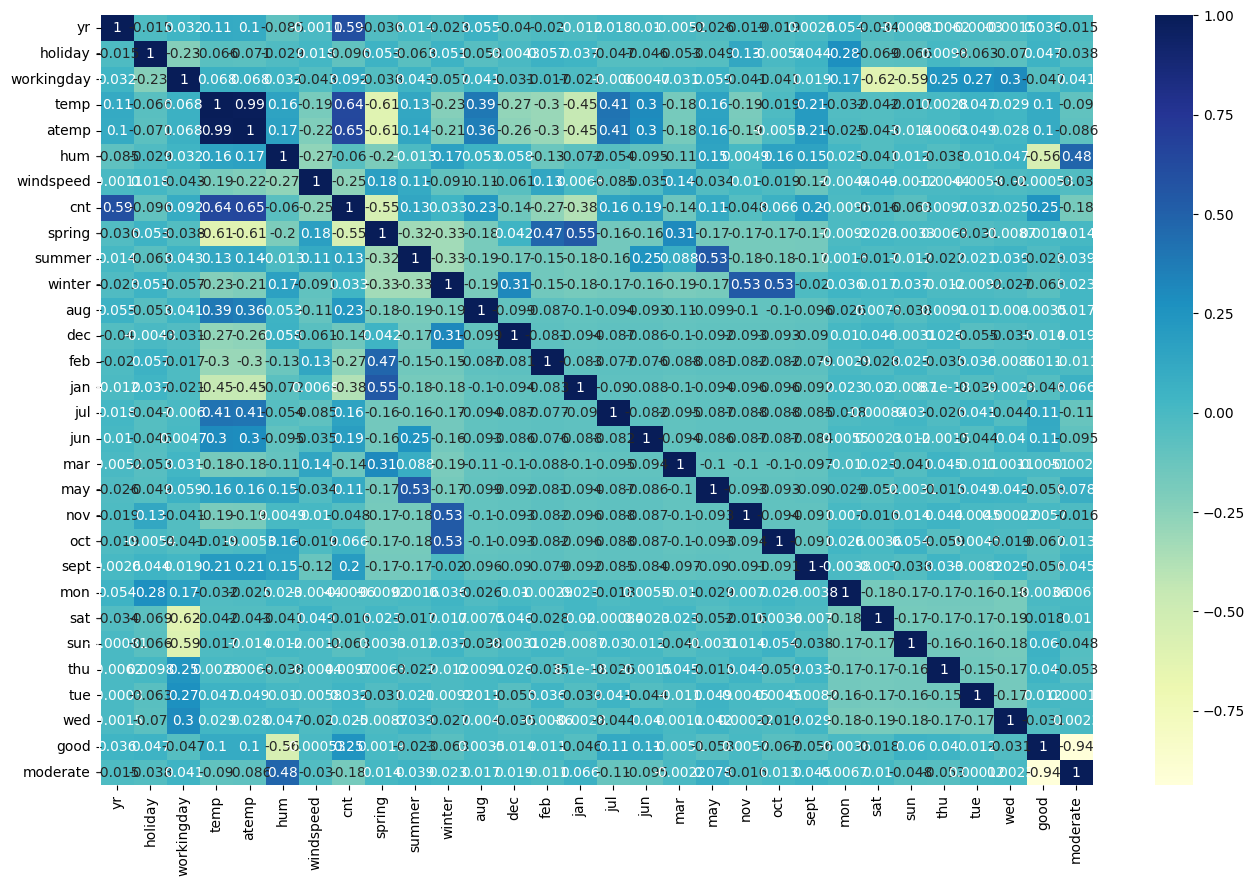

In [95]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed,

1. yr, temp are highly correlated with cnt (positive correlation) 
2. spring season is negatively correlated with cnt 
3. temp is very highly correlated to atemp 
4. months of jan feb are highly correlated with spring and months of nov and oct are highly coreelated with winter and may month is correlated with summer --- so basically season and months are correlated as season is split based on months 
5. weekdays are correlated with working day --- weekdays can be removed as specifically we did not find any trend by different days of the week
6. humidity is correlated with moderate weather and humidity is negatively correlated with good weather 

We will build a model with all the variables and then based on significance and vif can make a call to remove them from further models


### Dividing into X and Y sets for the model building

In [96]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

# Build a Model using RFE and Automated approach

In [99]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [107]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [104]:
X_train.head()
print(X_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'good', 'moderate'],
      dtype='object')


In [110]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [115]:
#Cut down number of features to 15 using automated approach
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=15)

#rfe = RFE(lm, 15)      
rfe = rfe.fit(X_train, y_train)

In [116]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 13),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 14),
 ('good', True, 1),
 ('moderate', True, 1)]

In [117]:
#var with true support 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jul', 'sept', 'sat', 'sun', 'good', 'moderate'],
      dtype='object')

In [118]:
#var with false support
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [120]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [121]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [122]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [123]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        13:13:12   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5471    328.328      0.102      0.9

# Inference based on true support variables 
1. Sunday variable does not have any significance in the presence of other variables  as p values is 0.55 
2. Can drop sunday variable

In [132]:
X_train_rfe_vif_check = X_train_rfe.drop(['const'], axis=1) 

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_vif_check
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,94.57
11,sat,22.15
12,sun,21.46
13,good,10.23
14,moderate,8.84
6,spring,5.02
1,holiday,4.66
3,temp,3.62
8,winter,3.49
7,summer,2.61


Inference 
Drop sunday variable as it is insignificant and also has high vif

# Model 2
Rebuilding the model without sun variable

In [ ]:
X_train_new = X_train_rfe.drop(["sun"], axis = 1)

In [125]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [126]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [127]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        13:17:31   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.4345    419.332     -0.092      0.9

In [128]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'jul', 'sept', 'sat', 'good', 'moderate'],
      dtype='object')

In [129]:
X_train_new = X_train_new.drop(['const'], axis=1) 

In [130]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.03
3,temp,21.43
12,good,14.49
13,moderate,8.87
6,spring,5.53
2,workingday,5.41
5,windspeed,4.66
8,winter,4.05
7,summer,3.18
0,yr,2.09


# Inference from vif 
1. hum, temp, good, moderate, spring and working day have higher vif i.e > 5 

As always it is best practise to remove variables one by one, removing hum and running model 3

# Model 3 without hum variable 

In [135]:
X_train_new = X_train_rfe.drop(["sun","hum"], axis = 1)

In [136]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [137]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [138]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          5.73e-189
Time:                        13:31:29   Log-Likelihood:                -4117.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1132.0864    337.658     -3.353      0.0

In [139]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring',
       'summer', 'winter', 'jul', 'sept', 'sat', 'good', 'moderate'],
      dtype='object')

In [ ]:
#X_train_new = X_train_new.drop(['const'], axis=1) 

In [140]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,93.96
12,good,8.63
13,moderate,8.57
6,spring,4.96
4,temp,3.38
8,winter,3.36
7,summer,2.59
3,workingday,1.87
11,sat,1.77
9,jul,1.48


As good has higher vif, and also from previous heatmap we were able to see good and moderate were highly correlated. So dropping good variable from the next model building

# MODEL 4
Without sun, hum and good variables 

In [141]:
X_train_new = X_train_rfe.drop(["sun","hum","good"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     162.0
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          4.84e-163
Time:                        13:34:54   Log-Likelihood:                -4181.5
No. Observations:                 510   AIC:                             8389.
Df Residuals:                     497   BIC:                             8444.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1335.3487    302.490      4.415      0.0

In [142]:
X_train_new = X_train_new.drop(['const'], axis=1) 

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.96
2,workingday,5.18
4,windspeed,4.60
5,spring,2.49
6,summer,2.32
0,yr,2.06
7,winter,1.97
10,sat,1.95
8,jul,1.58
11,moderate,1.54


As holiday has less 1.17 , we can proceed with the model to predict the output

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [164]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

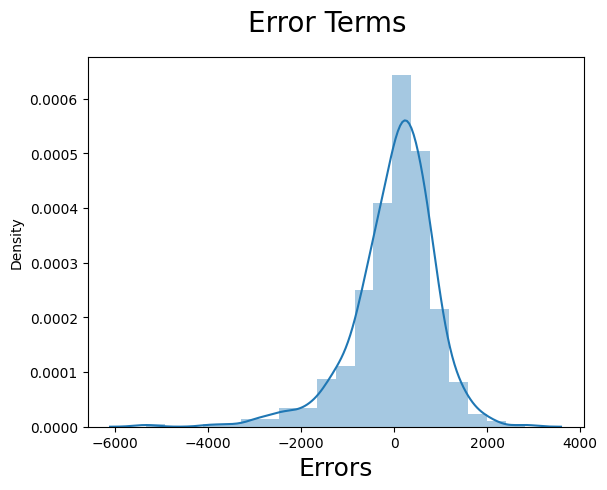

In [165]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error are normally distributed with mean centered at 0

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [ ]:
num_vars = ['temp','atemp','hum','windspeed','workingday']

df_test[num_vars] = scaler.transform(df_test[num_vars])

# did not execute this code as I already executed and deleted by mistake and tryin to run the code again throws an error as already the df_test was transformed

In [146]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,4546.981735,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,1898.633630,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [157]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'jul', 'sept', 'sat', 'moderate'],
      dtype='object')

In [158]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [159]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

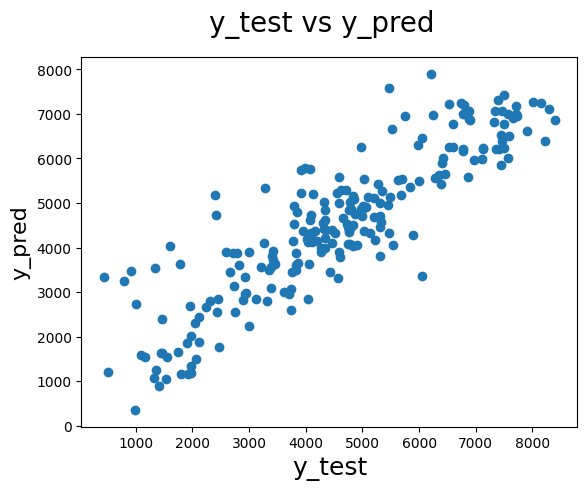

In [160]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cnt = 2079  \times  yr - 429  \times  holiday + 341 \times workingday + 4386 \times temp - 1555 \times windspeed - 505 \times spring + 429 \times summer + 656 \times winter - 461 \times jul + 575 \times sept + 441 \times sat -606 \times moderate $


# Interpretation from results 

1. In the data we had demand for year of 2018 and 2019 and by this, we were able to see the increase in demand during year 2019
2. Demand will be high during the working days and vice versa, demand goes down during holidays 
3. Demand will be high whenever there is an increase in temperature
4. During seasons of summer and winter, demand will be higher and demand goes down during spring season
5. Demand goes down during higher windspeed
6. In terms of months, september will have higher demand and july will have lower demand 
7. During moderate weather, demand goes down

Calculating r2 score for y_test 

In [161]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7792347441366558

Adjusted r2 score of y_test is very close to y_train . So, we can say that the model was able to predict well on the new data set using the trained features